<h1>Mode 60</h1>

In [20]:
import json
from matplotlib import pyplot as plt
import pandas as pd

In [21]:
windowSize = 50
RuleBasedResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode60-dqn/results_experiment_rule_based.json'
SequentialResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode60-dqn/sequential_rollout.json'
SequentialResults1 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode60-dqn/sequential_rollout_2.json'
#AsyncAuto_11_OLDMSE_20 = 'cross_11_on_20_asyncAuto_2agent.json'
#randomSequSIG = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode20-dqn/sequential_rollout_RANDOM_SIG.json'

def findMovingAvg(inputDF,window):
    movingAvgList = []
    for i in range(inputDF.shape[0] - window):
        newDF = inputDF.loc[i:i + window]
        epi = inputDF.iloc[i]['episode']
        meanVal = newDF['steps'].mean()
        movingAvgList.append({'episode':epi, 'smoothed_steps':meanVal})
    dfMovingAvg = pd.DataFrame(movingAvgList)
    return dfMovingAvg

<h3>Load rule based plot</h3>


In [22]:
with open(RuleBasedResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfBasePolicy_noavg = pd.DataFrame(listOfWholeTraining)
dfBasePolicy_noavg = dfBasePolicy_noavg.iloc[0:300]
dfBasePolicy = findMovingAvg(dfBasePolicy_noavg, windowSize)

<h3>Load Sequential Rollout  plot</h3>

In [23]:
with open(SequentialResults1, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfSeqRollout_noavg = pd.DataFrame(listOfWholeTraining)
dfSeqRollout_noavg = dfSeqRollout_noavg.iloc[0:3000]
dfSeqRollout = findMovingAvg(dfSeqRollout_noavg, windowSize)


In [24]:
dfBasePolicy_noavg.shape

(300, 2)

<h2>Plots</h2>

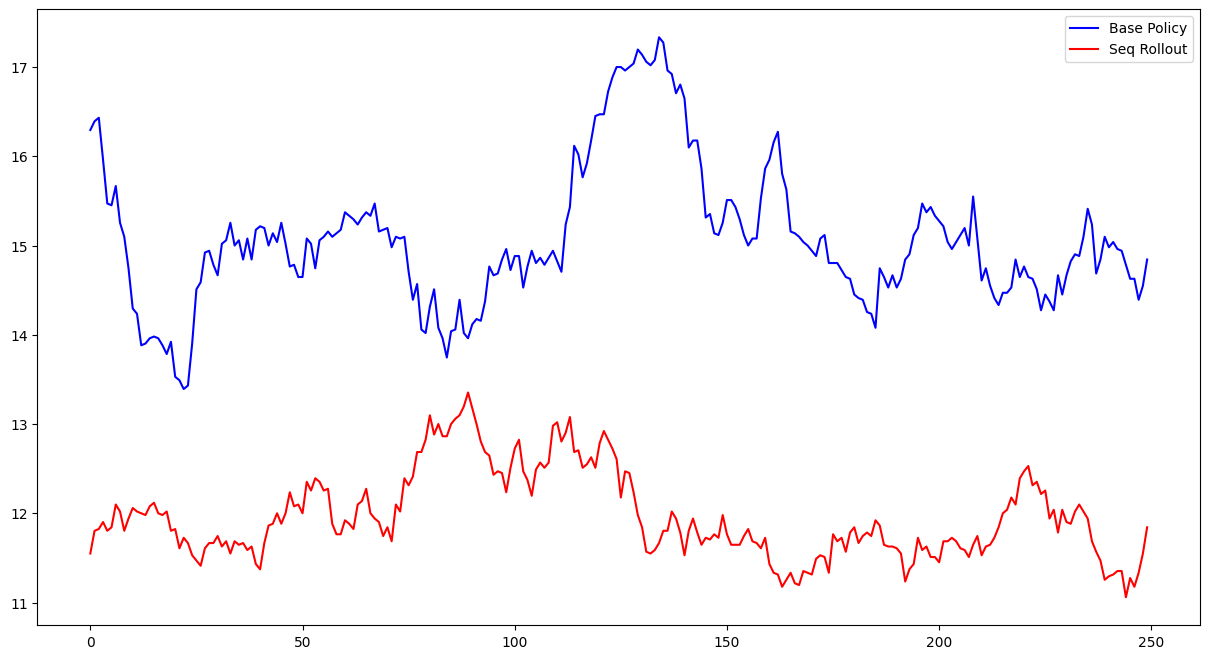

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(dfBasePolicy['episode'], dfBasePolicy['smoothed_steps'], label='Base Policy', color='blue', linestyle='-')
plt.plot(dfSeqRollout['episode'], dfSeqRollout['smoothed_steps'], label='Seq Rollout', color='red', linestyle='-')
#plt.plot(dfAsyncAuto_11OLDMSE_on_20['episode'], dfAsyncAuto_11OLDMSE_on_20['smoothed_steps'], label='Cross 11 Old MSE on 20', color='yellow', linestyle='-', marker='x')
#plt.plot(dfrandomSequSIG['episode'], dfrandomSequSIG['smoothed_steps'], label='Seq Rollout w/ Random Signlaiing ', color='red', linestyle='--')
plt.legend()